# Assignment 3: Non-Linear Models and Validation Metrics (37 total marks)
### Due: October 24 at 11:59pm

### Name: 

### In this assignment, you will need to write code that uses non-linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

### Import Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Regression (14.5 marks)

For this section, we will be continuing with the concrete example from yellowbrick. You will need to compare these results to the results from the previous assignment. Please use the results from the solution if you were unable to complete Assignment 2

### Step 1: Data Input (0.5 marks)

The data used for this task can be downloaded using the yellowbrick library: 
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the concrete dataset into the feature matrix `X` and target vector `y`.

In [5]:
# TO DO: Import concrete dataset from yellowbrick library
from yellowbrick.datasets import load_concrete
X, y = load_concrete()

### Step 2: Data Processing (0 marks)

Data processing was completed in the previous assignment. No need to repeat here.

### Step 3: Implement Machine Learning Model

1. Import the Decision Tree, Random Forest and Gradient Boosting Machines regression models from sklearn
2. Instantiate the three models with `max_depth = 5`. Are there any other parameters that you will need to set?
3. Implement each machine learning model with `X` and `y`

### Step 4: Validate Model

Calculate the average training and validation accuracy using mean squared error with cross-validation. To do this, you will need to set `scoring='neg_mean_squared_error'` in your `cross_validate` function and negate the results (multiply by -1)

### Step 5: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [24]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

scoring = "neg_mean_squared_error" 

# ----------------- Decision Tree -------------------

from sklearn.tree import DecisionTreeRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)
tree = DecisionTreeRegressor(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

dt_cross_score = cross_validate(tree, X_train, y_train, scoring=scoring, return_train_score=True)    # cv = 5????? 

for key in dt_cross_score:                                     # negate results 
    if key.startswith('test_') or key.startswith('train_'):
        dt_cross_score[key] = -dt_cross_score[key]
    
# Calculate the average training and validation accuracy 
dt_train_acc = dt_cross_score['train_score'].mean()
dt_valid_acc = dt_cross_score['test_score'].mean()


# ---------------- Random Forest --------------------
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth=5,random_state=0)
forest.fit(X_train, y_train)

rf_cross_score = cross_validate(forest, X_train, y_train, scoring=scoring, return_train_score=True)

for key in rf_cross_score:  # negate results 
    if key.startswith('test_') or key.startswith('train_'):
        rf_cross_score[key] = -rf_cross_score[key]
    
# Calculate the average training and validation accuracy 
rf_train_acc = rf_cross_score['train_score'].mean()
rf_valid_acc = rf_cross_score['test_score'].mean()


# ----------------- Gradient Boosting -------------------
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0)

gbrt = GradientBoostingRegressor(max_depth=5, random_state=0)
gbrt.fit(X_train, y_train)

gb_cross_score = cross_validate(gbrt, X_train, y_train, scoring=scoring, return_train_score=True)

for key in gb_cross_score:  # negate results 
    if key.startswith('test_') or key.startswith('train_'):
        gb_cross_score[key] = -gb_cross_score[key]
    
# Calculate the average training and validation accuracy 
gb_train_acc = gb_cross_score['train_score'].mean()
gb_valid_acc = gb_cross_score['test_score'].mean()

In [43]:
# ---------------- Visualize Results for MSE ---------------------

# Create a pandas DataFrame results with columns: Training accuracy and Validation accuracy, and index: DT, RF and GB
# Add the accuracy results to the results DataFrame
# Print results

results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=['DT', 'RF', 'GB'])

results.iloc[0] = [dt_train_acc, dt_valid_acc]   # Decision Tree, DT
results.iloc[1] = [rf_train_acc, rf_valid_acc]   # Random Forest, RF
results.iloc[2] = [gb_train_acc, gb_valid_acc]   # Gradient Boosting,GB

print(results)

   Training Accuracy Validation Accuracy
DT         47.279761           73.447331
RF         29.577455           45.059351
GB           3.37944           22.783221


Repeat the step above to print the R2 score instead of the mean-squared error. For this case, you can use `scoring='r2'`

In [44]:
# ---------------- Visualize Results for R2 ---------------------
scoring_r2 = "r2" 

models_list = (tree, forest, gbrt)
results_r2 = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=['DT', 'RF', 'GB'])
i = 0

for model in models_list: 
    cross_score = cross_validate(model, X_train, y_train, scoring=scoring_r2, return_train_score=True) 
    results_r2.iloc[i] = [cross_score['train_score'].mean(), cross_score['test_score'].mean()]
    i+=1 

print(results_r2)

   Training Accuracy Validation Accuracy
DT          0.834465            0.738697
RF          0.896557            0.840927
GB          0.988171            0.919471


### Questions (6 marks)
1. How do these results compare to the results using a linear model in the previous assignment? Use values.
1. Out of the models you tested, which model would you select for this dataset and why?
1. If you wanted to increase the accuracy of the tree-based models, what would you do? Provide two suggestions.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

I used chatGPT before starting the assignment and asked it to give me a brief and simple explanation of what Decision Tree, Random Forest and Gradient Boosting were as a refresher. I did each step in order as its written. I used most of the code from examples in class and I used the attached links as sort of refreshers of how to make/edit dataframe objects for the results dataframe because I forget the syntax. And I got very confused on cross_validate and read the attached link and used the code from there and compared to in-class example to complete that part of the assignment.
I find it challenging to understand all the different terms and what the values I get actually mean, but I think that is the whole point of the assignment. 

https://machinelearningmastery.com/training-validation-test-split-and-cross-validation-done-right/
https://stackoverflow.com/questions/19851005/rename-pandas-dataframe-index
https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/

## Part 2: Classification (17.5 marks)

You have been asked to develop code that can help the user classify different wine samples. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 1: Data Input (2 marks)

The data used for this task can be downloaded from UCI: https://archive.ics.uci.edu/dataset/109/wine

Use the pandas library to load the dataset. You must define the column headers if they are not included in the dataset 

You will need to split the dataset into feature matrix `X` and target vector `y`. Which column represents the target vector?

Print the size and type of `X` and `y`

In [80]:
# Import wine dataset

url = "file:///C:/Users/bains/OneDrive/Desktop/UoC%20-%20Fall2023/ensf611/Assignment3/wine/wine.data"
column_headers = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
                 "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
                 "Colour intensity", "Hue", "OD280/OD315 of diluted wines", "Proline "]

wine_data = pd.read_csv(url, names=column_headers)

X_wine = wine_data.drop('class', axis=1)
y_wine = wine_data['class'] # target vector is the class column, which I read from the download website 

print("X: size is {0} and type is {1}".format(X_wine.size, type(X_wine)))
print("y: size is {0} and type is {1}".format(y_wine.size, type(y_wine)))

X: size is 2314 and type is <class 'pandas.core.frame.DataFrame'>
y: size is 178 and type is <class 'pandas.core.series.Series'>


### Step 2: Data Processing (1.5 marks)

Print the first five rows of the dataset to inspect:

In [81]:
wine_data.head() # I am assuming the whole dataset here 

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Colour intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values

In [52]:
wine_data.isnull().sum() # no missing values from dataset 

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Colour intensity                0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

How many samples do we have of each type of wine?

In [82]:
count = wine_data["class"].unique().size  # unique classes 
print(wine_data.shape) # 178 samples of wine 

(178, 14)


### Step 3: Implement Machine Learning Model

1. Import `SVC` and `DecisionTreeClassifier` from sklearn
2. Instantiate models as `SVC()` and `DecisionTreeClassifier(max_depth = 3)`
3. Implement the machine learning model with `X` and `y`

### Step 4: Validate Model 

Calculate the average training and validation accuracy using `cross_validate` for the two different models listed in Step 3. For this case, use `scoring='accuracy'`

### Step 5: Visualize Results (4 marks)

#### Step 5.1: Compare Models
1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [90]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train_wine, X_val_wine, y_train_wine, y_val_wine = train_test_split(X_wine, y_wine, random_state=0)

# ----------------- Decision Tree ------------------------
wine_tree = DecisionTreeClassifier(max_depth=3, random_state=0)
wine_tree.fit(X_train_wine, y_train_wine)

wine_tree_cross_score = cross_validate(wine_tree, X_train_wine, y_train_wine, scoring='accuracy') #, return_train_score=True) 


In [ ]:
# ----------------- SVC ------------------------
from sklearn.svm import SVC
svc = SVC()
wine_svc = svc.fit(X_train_wine, y_train_wine)

In [96]:
# ----------------- Results -------------------
models_list = (wine_tree, wine_svc)
results = pd.DataFrame(columns=["Training Accuracy", "Validation Accuracy"], index=['DT', 'SVC'])
i = 0

for model in models_list: 
    cross_score = cross_validate(model, X_train_wine, y_train_wine, scoring='accuracy', return_train_score=True) 
    results.iloc[i] = [cross_score['train_score'].mean(), cross_score['test_score'].mean()]
    i+=1 

print(results)

    Training Accuracy Validation Accuracy
DT           0.994357            0.894017
SVC          0.680427            0.676638


#### Step 5.2: Visualize Classification Errors
Which method gave the highest accuracy? Use this method to print the confusion matrix and classification report:

In [ ]:
# TO DO: Implement best model

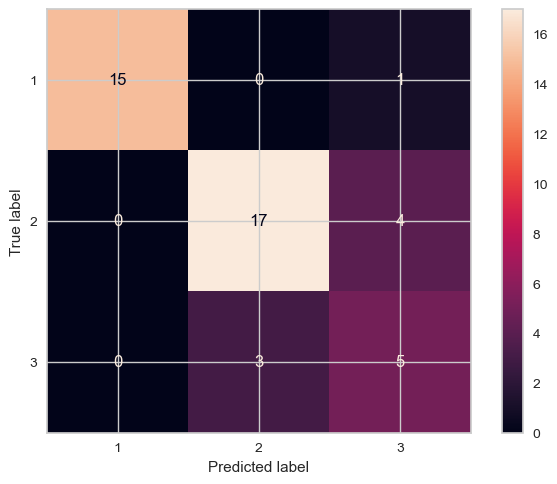

In [111]:
# TO DO: Print confusion matrix using a heatmap
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_val_wine, 
                                        wine_svc.predict(X_val_wine), 
                                        display_labels=['1', '2', '3'],
                                        cmap='rocket',
                                        colorbar=True);

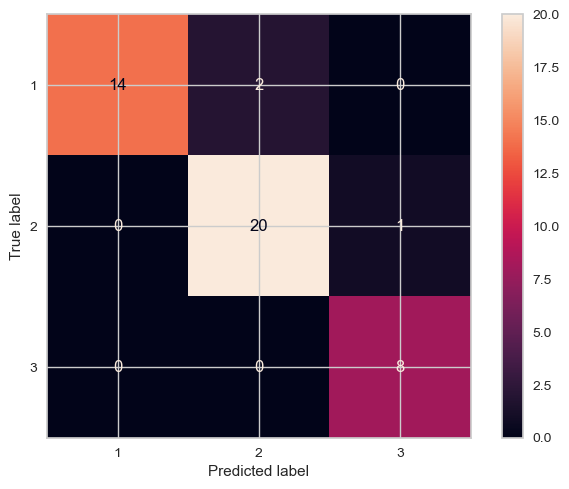

In [110]:
ConfusionMatrixDisplay.from_predictions(y_val_wine, 
                                        wine_tree.predict(X_val_wine), 
                                        display_labels=['1', '2', '3'],
                                        cmap='rocket',
                                        colorbar=True);

In [105]:
# TO DO: Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_val_wine, wine_svc.predict(X_val_wine))) # SVC model

              precision    recall  f1-score   support

           1       1.00      0.94      0.97        16
           2       0.85      0.81      0.83        21
           3       0.50      0.62      0.56         8

    accuracy                           0.82        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.84      0.82      0.83        45



In [106]:
print(classification_report(y_val_wine, wine_tree.predict(X_val_wine))) # tree model 

              precision    recall  f1-score   support

           1       1.00      0.88      0.93        16
           2       0.91      0.95      0.93        21
           3       0.89      1.00      0.94         8

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.93        45
weighted avg       0.94      0.93      0.93        45



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the method used? Explain with values.
1. What are two reasons why the support vector machines model did not work as well as the tree-based model?
1. How many samples were incorrectly classified in step 5.2? 
1. In this case, is maximizing precision or recall more important? Why?

*YOUR ANSWERS HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

## Part 5: Bonus Question (3 marks)

Repeat Part 2 and compare the support vector machines model used to `LinearSVC(max_iter=5000)`. Does using `LinearSVC` improve the results? Why or why not?

Is `LinearSVC` a good fit for this dataset? Why or why not?

Training accuracy is 0.99247 and the validation accuracy is 0.97749 for the linear SVM.


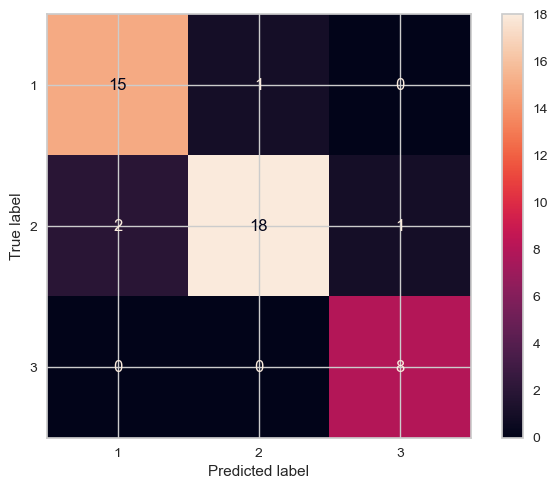

In [133]:
# --------------------- Linear SVM ---------------------------
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=5000, dual=False)
linear_svm.fit(X_train_wine, y_train_wine)

cross_score = cross_validate(linear_svm, X_train_wine, y_train_wine, scoring='accuracy', return_train_score=True) 
print("Training accuracy is {:.5f} and the validation accuracy is {:.5f} for the linear SVM.".format(cross_score['train_score'].mean(), 
                                                                                              cross_score['test_score'].mean()))

ConfusionMatrixDisplay.from_predictions(y_val_wine, 
                                        linear_svm.predict(X_val_wine), 
                                        display_labels=['1', '2', '3'],
                                        cmap='rocket',
                                        colorbar=True);

In [130]:
print(classification_report(y_val_wine, linear_svm.predict(X_val_wine))) # linear SVC model

              precision    recall  f1-score   support

           1       0.88      0.94      0.91        16
           2       0.95      0.86      0.90        21
           3       0.89      1.00      0.94         8

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.92        45
weighted avg       0.91      0.91      0.91        45

